### About dataset:

### Objective:To better predict the likelihood of default for  customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel("credit_card_data.xls",header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


 ## EDA

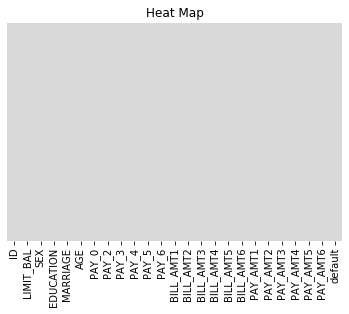

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [4]:
# Heatmap---Looking for null values in the dataset
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,linecolor='white',cmap='tab20c_r')
plt.title('Heat Map')
plt.show()
sns.heatmap

### Explanation: From the above heat map we can see that there are no null values present in dataset

In [5]:
print("Count of Non default's:",df.default.value_counts()[0])
print("Count of default's:",df.default.value_counts()[1] )     

Count of Non default's: 23364
Count of default's: 6636


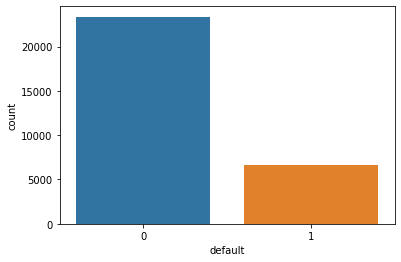

In [6]:
## default : '0' indicates paid and '1' indicates default
import seaborn as sns
sns.countplot(df['default'])

### Explanation:We can see that the classes are imbalanced,so we need to use class weight='balanced'

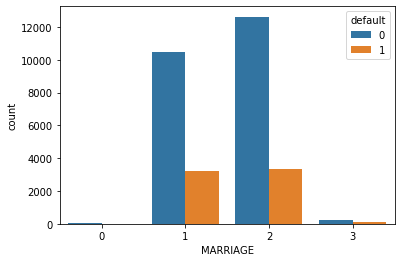

In [7]:
## '1': married,'2':Single,'3':others
sns.countplot(x=df.MARRIAGE,hue=df.default)

### Explanation: From the above plot we can see that the single and married people both are having almost same default rate while for other it is less comparitively.

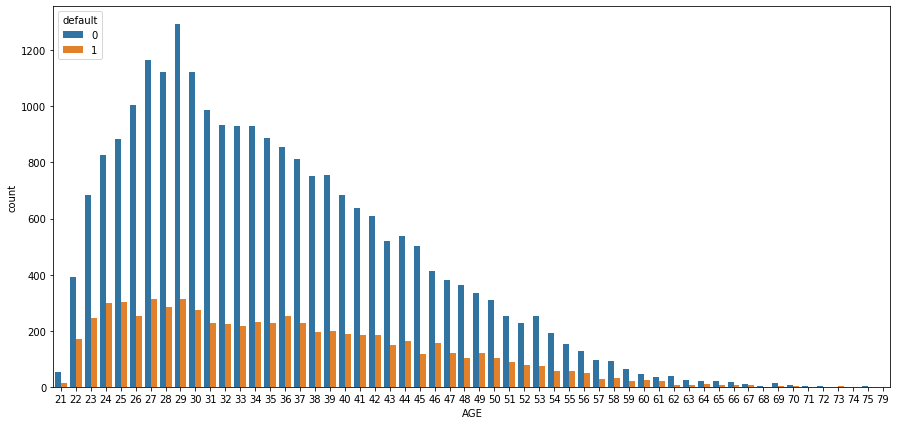

In [8]:
### Visualizing  Age wise default rate
plt.figure(figsize=(15,7))
sns.countplot(df.AGE,hue=df.default)

In [9]:
#fig, ax = plt.subplots(figsize=(15,7))
#df.groupby(['AGE']).count()['default'].plot(ax=ax)

### From the above countplot we can observe the age wise default rate.The orange bars indicates the default .The people with age between 23 to 30 years are having more defaut rate when compared to other age groups.

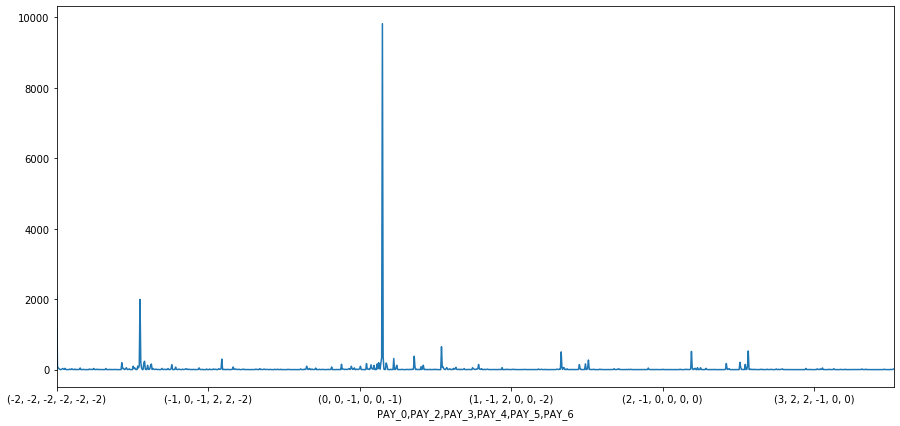

In [10]:
### Repayment status: 0-not default ,1-payment delay for 1 month ,2-payment delay for 2 months, -1-pay duly
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']).count()['default'].plot(ax=ax)

### Explanation :The pay_0,pay_2 ,pay_3,pay_4,pay_5,pay_6 are the past monthly  repayement records for the months of  september,august,july,june,may,april . From which we can observe that the repayement has happend more in the month of july.

In [11]:
x=df.iloc[:,df.columns!='default']
y=df['default']

In [12]:
## train nd split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

## 1) Logistic Regression

In [13]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
x_train= sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression(random_state=100,class_weight='balanced') ## Since the default credit  is imbalanced we took class_weigth has balanced.
clf1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=100)

In [15]:
y_pred_lr=clf1.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:",con1)

Confusion Matrix: [[4854 2073]
 [ 724 1349]]


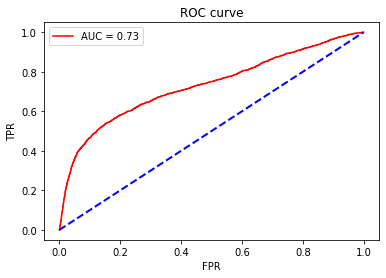

In [17]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = clf1.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score
from sklearn.metrics import accuracy_score
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred_lr))

precision = precision_score(y_test, y_pred_lr)
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_lr)
print('Recall: %.3f' % recall)


score = f1_score(y_test, y_pred_lr)
print('F1 Score: %.3f' % score)


roc=roc_auc_score(y_test, y_pred_lr)
print('ROC : %.3f'%roc)

Accuracy: 0.689
Precision: 0.394
Recall: 0.651
F1 Score: 0.491
ROC : 0.676


### Conclusion:In Logistic Regression,we got accuracy as 0.689 which means that my model is capable of classifying 68.9% of the data points correctly. AUC is 0.73 i.e, 73% of my model is capable of distinguishing between the classes

In [19]:
X=df.iloc[:,df.columns!='default']
y=df['default']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

### 2) Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion='gini',splitter='random',random_state=100,class_weight='balanced',max_depth=8)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=100,
                       splitter='random')

In [22]:
y_pred_dt=clf2.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
con2=confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:",con2)

Confusion Matrix: [[5769 1158]
 [ 906 1167]]


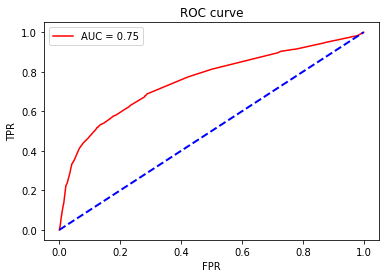

In [24]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = clf2.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score
from sklearn.metrics import accuracy_score
print('Accuracy:%.3f'%accuracy_score(y_test,y_pred_dt))

precision = precision_score(y_test, y_pred_dt, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_dt, average='binary')
print('Recall: %.3f' % recall)


score = f1_score(y_test, y_pred_dt, average='binary')
print('F-Measure: %.3f' % score)

roc_dt=roc_auc_score(y_test,y_pred_dt)
print("ROC:%.3f"%roc_dt)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

Accuracy:0.771
Precision: 0.502
Recall: 0.563
F-Measure: 0.531
ROC:0.698
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6927
           1       0.50      0.56      0.53      2073

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.78      0.77      0.78      9000



### Conclusion:In Decision Trees,we got accuracy as 77.1% which means that my model is capable of classifying 77.1% of the data points correctly. AUC is 0.75 i.e, 75% of my model is capable of distinguishing between the classes.

### 3) Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=8,min_samples_leaf=45,n_estimators = 120,class_weight='balanced', random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=45, n_estimators=120, random_state=42)

In [27]:
y_pred_rf=rf.predict(X_test)
y_pred_train_rf=rf.predict(X_train)

In [28]:
con3=confusion_matrix(y_test,y_pred_rf)
print("Confusion matrix:",con3)

Confusion matrix: [[5675 1252]
 [ 797 1276]]


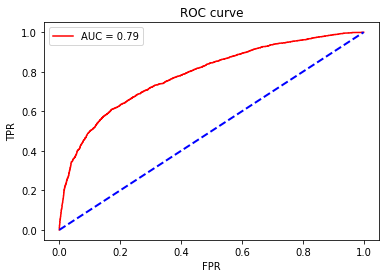

In [29]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [30]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
print('Accuracy of test data:%.3f'%accuracy_score(y_test,y_pred_rf))
print('Accuracy of train data:%.3f'%accuracy_score(y_train,y_pred_train_rf))


roc_rf=roc_auc_score(y_test,y_pred_rf)
print("ROC:%.3f"%roc_rf)

Accuracy of test data:0.772
Accuracy of train data:0.780
ROC:0.717


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6927
           1       0.50      0.62      0.55      2073

    accuracy                           0.77      9000
   macro avg       0.69      0.72      0.70      9000
weighted avg       0.79      0.77      0.78      9000



### Conclusion :
#### -> The accuracy of train and test data are almost same i.e, there is no overfitting happening .
#### -> But from the above classification report we can see that the precison, recall and F1 Score of class 0 and class1  are  varying.
#### -> And also the count of 0's and 1's are very vast. 
#### So ,inorder to deal with it we are using SMOTE technique. 

### Smote (synthetic minority oversampling technique) 
###  It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them

In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Over Sampling :

In [33]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_sm,y_sm = sm.fit_sample(X, y) 

In [34]:
print("The shape of data before oversampling: ",X.shape)
print("The shape of data after oversampling: ",X_sm.shape)

The shape of data before oversampling:  (30000, 24)
The shape of data after oversampling:  (46728, 24)


In [35]:
#Splitting the dataset into train and test part
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = test_size, random_state = seed) 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,max_depth=9,min_samples_leaf=45)
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=9, min_samples_leaf=45, n_estimators=300)

In [37]:
from sklearn.metrics import confusion_matrix
pred_rf_sm=rf.predict(X_test_sm)
cm=confusion_matrix(y_test_sm,pred_rf_sm)
cm

array([[5713, 1253],
       [1930, 5123]], dtype=int64)

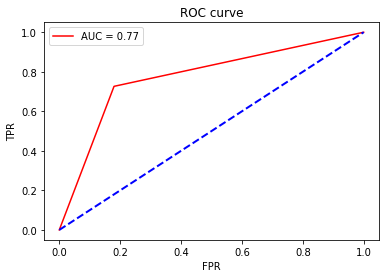

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test_sm, pred_rf_sm, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy:%.3f'%accuracy_score(y_test_sm,pred_rf_sm))
print()
print("Classification report:")
print(classification_report(y_test_sm,pred_rf_sm))

Accuracy:0.773

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6966
           1       0.80      0.73      0.76      7053

    accuracy                           0.77     14019
   macro avg       0.78      0.77      0.77     14019
weighted avg       0.78      0.77      0.77     14019



### Conclusion: After applying SMOTE(over sampling) we can observe that:
#### -> The count of class 1 has been increased by creating the replicates .
#### ->  Fscore of class 1 has been increased from 0.55 to 0.76  and also the precision and recall have increased simultaneously.

### Under Sampling:

### The NearMiss Algorithm has undersampled the majority instances and made it equal to minority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.

In [40]:
from imblearn.under_sampling import NearMiss
under=NearMiss()
X_under,y_under=under.fit_sample(X,y)

In [41]:
print("The shape of data before undersampling: ",X.shape)
print("The shape of data after underampling: ",X_under.shape)

The shape of data before undersampling:  (30000, 24)
The shape of data after underampling:  (13272, 24)


In [42]:
from sklearn.model_selection import train_test_split
X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_under,y_under,test_size=0.30,random_state=10)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_under=RandomForestClassifier(n_estimators=300,max_depth=9,min_samples_leaf=45)
rf_under.fit(X_train_under,y_train_under)

RandomForestClassifier(max_depth=9, min_samples_leaf=45, n_estimators=300)

In [44]:
from sklearn.metrics import confusion_matrix
pred_rf_under=rf.predict(X_test_under)
con_under=confusion_matrix(y_test_under,pred_rf_under)
print(con_under)

[[1352  666]
 [ 826 1138]]


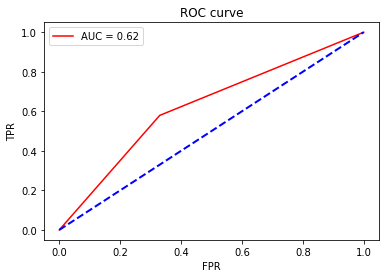

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test_under, pred_rf_under, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Accuracy Score:%.3f"%accuracy_score(y_test_under,pred_rf_under))
print(classification_report(y_test_under,pred_rf_under))

Accuracy Score:0.625
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      2018
           1       0.63      0.58      0.60      1964

    accuracy                           0.63      3982
   macro avg       0.63      0.62      0.62      3982
weighted avg       0.63      0.63      0.62      3982



### Conclusion:From the above classification report which is obtained after applying under sampling ,we can see that :
#### -> The count of class 0 has been reduced and the count  differece between the class 0 and class 1 is less.
#### -> Since ,there is a loss of information happening ,so the precision,recall and Fscore has been reduced.

 ## Final Report:

## Visually analysing and comparing the results

### Accuracy :

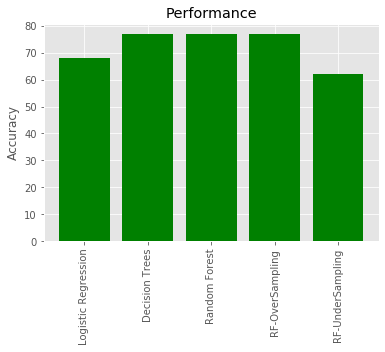

In [47]:
plt.style.use('ggplot')
x = ['Logistic Regression','Decision Trees', 'Random Forest','RF-OverSampling','RF-UnderSampling']
accuracy = [68,77,77,77,62]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos,accuracy, color='green')
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.title("Performance")
plt.xticks(x_pos, x)
plt.show()

### Final Conclusion:
#### --> From the above barplot, Random forest and Random forest with Over sampling are giving the best results when compared to other techniques.
#### --> The recall,precision and fscore of over sampling(randomforest) is more than random forest(class_weight='bal').
#### -->So, we are concluding that the Random Forest with SMOTE(over sampling) is giving the best results on our dataset inorder to classify the default and non default candidates.